* Date: 16-06-2025
* Student name: Chaw Su Su Thinn
* Student ID: c0916347

## Objective

You are given a dataset of used car listings. Your task is to build multiple regression models to predict the selling price of used cars based on features like age, brand, kilometers driven, fuel type, etc.
Compare the models based on performance, and save the best model for future deployment.

## Dataset

The dataset used in this project is sourced from the Kaggle competition: [Playground Series - Season 4, Episode 9](https://www.kaggle.com/competitions/playground-series-s4e9/overview).

It includes training and testing sets related to used car listings, designed for regression-based price prediction. 

Each row represents an individual car listing with several key attributes:

* **id**: Unique identifier for each car entry.
* **brand**: Manufacturer name (e.g., Toyota, BMW).
* **model**: Specific model name, often containing trim-level info.
* **year**: Year of manufacture — useful for calculating vehicle age.
* **transmission**: Indicates if the vehicle is **Automatic** or **Manual**.
* **fuel_type**: Type of fuel used (e.g., **Gasoline**, **Diesel**, **Hybrid**, etc.).
* **engine_type**: Description of the engine (e.g., V6, 2.0L).
* **exterior_color**: Primary body color.
* **interior_color**: Interior color.
* **accident**: Indicates if the vehicle has any accident history.
* **clean_title**: Whether the car holds a clean ownership title.
* **price** *(only in train.csv)*: The **target** variable which is the resale price of the vehicle.

## Import libraries

In [1]:
%pip install -r "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import date
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
import gc

## 1. Data Preprocessing

### 1.1 Load the dataset and perform basic cleaning (handle missing values, duplicates).

In [3]:
# Define file paths of the datasets
train_path = "../dataset/train.csv"
test_path = "../dataset/test.csv"

# Load datasets into pandas DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
# Display first 5 rows
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
# Display first 5 rows
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [6]:
# Check data types and non-null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
# Check data types and non-null counts
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [8]:
# Check statistics summary
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [9]:
# Check statistics summary
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [10]:
# Check missing values for each column
train_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [11]:
# Check missing values for each column
test_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

**Observations from initial analysis of both datasets:**

* The training set contains 188,533 records, while the test set contains 125,690 records.

* From train_df,

    * There are 5083 missing values in `fuel_type` and 2452 in `accident`. 

    * Meanwhile, `clean_title` has 21419 missing records. I will further analyze whether to drop these records or replace them. 

* From test_df,

    * 3383 missing `fuel_type` records and 1632 missing `accident` records.

    * Whereas, there are 14239 missing records in `clean_title`.

<Axes: >

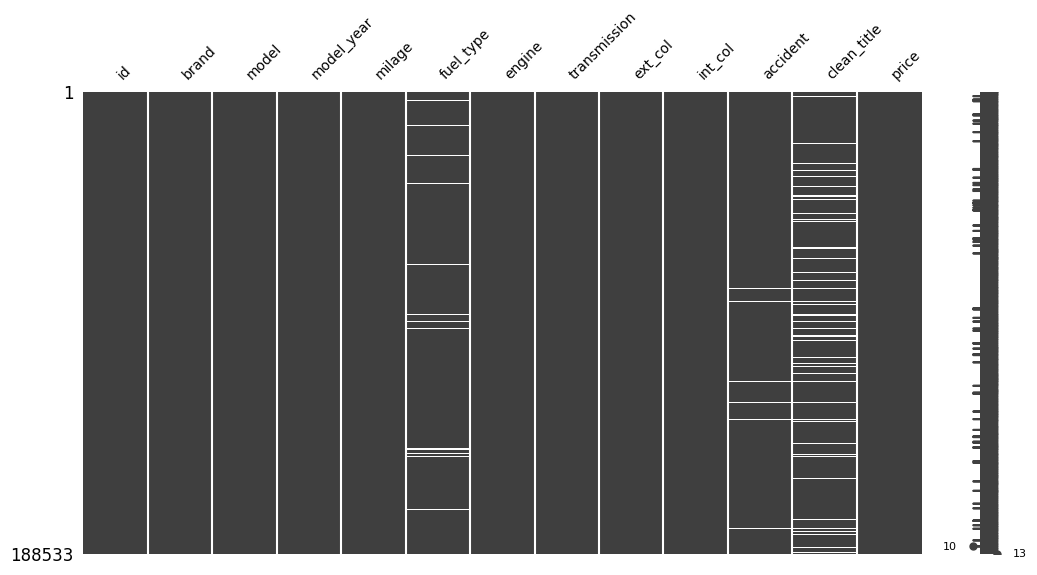

In [12]:
# Visualize missing values
msno.matrix(train_df, figsize=(12, 6), fontsize=10)

<Axes: >

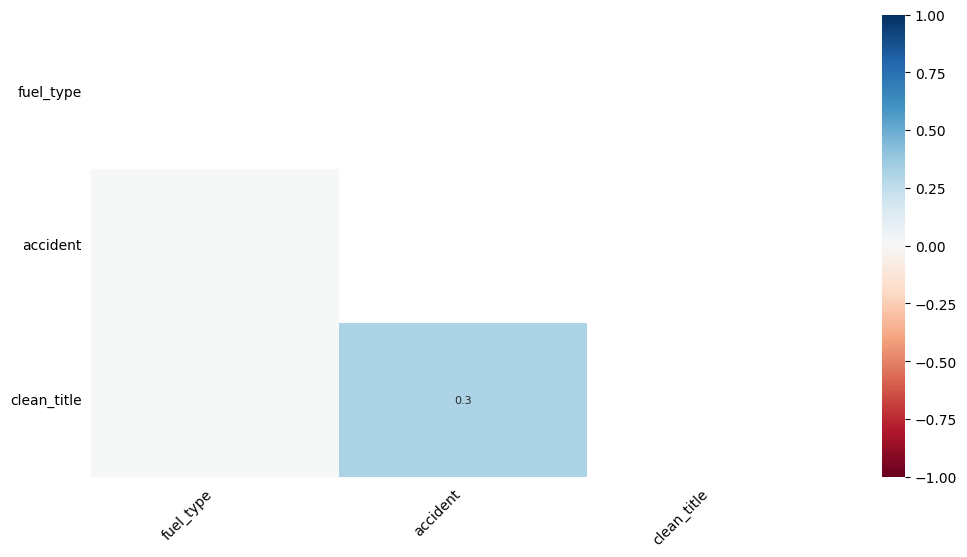

In [13]:
msno.heatmap(train_df, figsize=(12, 6), fontsize=10)

**Observations from missing value matrix and heatmap:**

* The matrix shows missing values mostly occur independently across `fuel_type`, `accident`, and `clean_title`.

* From the heatmap, only `accident` and `clean_title` have a weak correlation (0.3), meaning some overlap in missing rows, but nothing strong enough to suggest joint imputation.

* So, I’ll handle missing values for each column separately.

In [14]:
# Verify unique values in the missing columns
missing_columns = train_df.columns[train_df.isna().any()]

for col in missing_columns:
    print(f"Unique values count of {col}: {train_df[col].nunique()}")
    print(f"{train_df[col].unique()}\n")

Unique values count of fuel_type: 7
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Unique values count of accident: 2
['None reported' 'At least 1 accident or damage reported' nan]

Unique values count of clean_title: 1
['Yes' nan]



In [15]:
for col in missing_columns:
    print(f"Value counts of {col}: {train_df[col].value_counts()}\n")

Value counts of fuel_type: fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

Value counts of accident: accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

Value counts of clean_title: clean_title
Yes    167114
Name: count, dtype: int64



**Observations from unqiue values and counts:**

* All three columns that have missing values are categorical.

    * `fuel_type` has 7 unique values. Among them, `–` (781 records) and `not supported` (15 records) don't indicate valid fuel types. So, I’ll treate them as invalid fuel types alongside the missing values, and replace with `Unknown`. 

    * `accident` has only two values, `None reported` and `At least 1 accident or damage reported`. Since `None Reported` has 144,514 rows, I will leave them as-is, and I’ll fill missing values with `Unknown`.

    * `clean_title` only has `Yes`. Since there’s no alternative value, I’ll treat missing records as `Unknown`.

In [16]:
# Create function to clean and standardize columns
def clean_categorical_columns(df):
    df = df.copy()

    # Define valid categorical types
    valid_fuels = {'gasoline', 'diesel', 'electric', 'hybrid', 'plug-in hybrid', 'flex fuel', 'natural gas'}

    # Replace invalid types in 'fuel_type' with 'Unknown'
    df['fuel_type'] = df['fuel_type'].str.strip().str.lower().apply(
        lambda x: x if x in valid_fuels else 'Unknown'
    )

    # Replace missing values in 'accident'
    df['accident'] = df['accident'].fillna('Unknown')

    # Replace missing values in 'clean_title'
    df['clean_title'] = df['clean_title'].fillna('Unknown')

    return df

In [17]:
# Call function to clean both datasets
train_df = clean_categorical_columns(train_df)
test_df = clean_categorical_columns(test_df)

In [18]:
# Verify again
print(train_df.isna().sum())
print(test_df.isna().sum())

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


In [19]:
# Check full row duplicates
print(train_df.duplicated().sum())

0


In [20]:
# Define columns to check
to_check = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident']

# Check count of every duplicated row including first occurrence
print(train_df.duplicated(subset=to_check, keep=False).sum()) 

356


In [21]:
# Add 'clean_title' as well to check for duplciates 
print(train_df.duplicated(subset=to_check + ['clean_title'], keep=False).sum()) 

0


**Observations from duplicate checks:**

* Using `train_df.duplicated().sum()`, I found 0 exact duplicates across all columns.

* After that, I checked a subset of columns that define a car’s specification and history (`brand`, `model`, `model_year`, `milage`, `fuel_type`, `engine`, `transmission`, `ext_col`, `int_col`, `accident`), and there are 356 duplicate entries found. 

* However,I added `clean_title` in the subset. Then, the duplicate count drops back to 0. This means that listings which are otherwise identical differ only by title condition (`clean_title`). I will not drop these since this is considered as a different record.

### 1.2 Create a new feature: `car_age = current_year - year`.

In [22]:
# Get current year using date.today().year
current_year = date.today().year
print(current_year)

2025


In [23]:
# Check unique values of model year
train_df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992])

In [24]:
# Create new column to calculate car age
train_df['car_age'] = current_year - train_df['model_year']
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,0,MINI,Cooper S Base,2007,213000,gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,18
1,1,Lincoln,LS V8,2002,143250,gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Unknown,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,23
3,3,Genesis,G90 5.0 Ultimate,2017,19500,gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,8
4,4,Mercedes-Benz,Metris Base,2021,7388,gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,4


In [25]:
# Do the same for test_df
test_df['car_age'] = current_year - test_df['model_year']
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age
0,188533,Land,Rover LR2 Base,2015,98000,gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,10
1,188534,Land,Rover Defender SE,2020,9142,hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,5
2,188535,Ford,Expedition Limited,2022,28121,gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,Unknown,3
3,188536,Audi,A6 2.0T Sport,2016,61258,gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,Unknown,9
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,7


### 1.3 Drop irrelevant features like `car_name` if present.

In [26]:
# Check the column names
print(train_df.columns)
print(test_df.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'car_age'],
      dtype='object')
Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'car_age'],
      dtype='object')


In [27]:
# Drop irrelevant columns
train_df.drop(['id'], axis=1, inplace=True, errors='ignore')
test_df.drop(['id'], axis=1, inplace=True, errors='ignore')

In [28]:
# Verify columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  clean_title   188533 non-null  object
 11  price         188533 non-null  int64 
 12  car_age       188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


### 1.4 Convert categorical variables using One-Hot Encoding or Label Encoding.

In [29]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    unique_count = train_df[col].nunique()
    print(f"Count of unique values in '{col}': {unique_count}")
    print()

Count of unique values in 'brand': 57

Count of unique values in 'model': 1897

Count of unique values in 'fuel_type': 5

Count of unique values in 'engine': 1117

Count of unique values in 'transmission': 52

Count of unique values in 'ext_col': 319

Count of unique values in 'int_col': 156

Count of unique values in 'accident': 3

Count of unique values in 'clean_title': 2



**Strategies for categorical features:**

* `fuel_type`, `accident` and `clean_title` have low cardianlity of less than 10 unique values and their values have no inherent ordinal relationship. Thus, I am using `OneHotEncoder` to convert these categorical features into binary indicator variables without introducing any artificial ordering. 

* Aside from `fuel_type`, `accident` and `clean_title`, the rest of categorical features have high cardinality.

* Especially, `model` and `engine` columns, which has 1897 and 1117 unique values respectively. This makes typical one-hot encoding impractical due to dimensionality explosion and risk of overfitting.

* According to scikit-learn's documentation, for such columns, it is suggested to use `TargetEncoder`. (scikit-learn User Guide, 2024)

* So, in my case:

    * I’ll apply `TargetEncoder` for `model`, `engine`, `ext_col` and `int_col`.

    * For moderate-cardinality features like `brand` and `transmission`, I’ll use `OneHotEncoder` with `handle_unknown='infrequent_if_exist'`.

    * If needed, I can also use `OrdinalEncoder(max_categories=100)` or `FeatureHasher` to compress high-cardinality columns into a smaller, manageable space.

In [30]:
# Define target
target = 'price'

# Separate target and features
y_train = train_df[target]
X_train = train_df.drop(columns=[target])
X_test = test_df.copy()

In [31]:
print(X_train.shape)
print(X_test.shape)

(188533, 12)
(125690, 12)


In [32]:
# Define columns
low_cardinality_cols = ['fuel_type', 'accident', 'clean_title']

# Encode 
column_transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), low_cardinality_cols)
    ],
    remainder='passthrough'  # keep other features untouched
)

# Fit and transform train data
X_train_encoded = column_transformer.fit_transform(X_train)

# Transform test data
X_test_encoded = column_transformer.transform(X_test)

In [33]:
# Verify the changes
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(188533, 19)
(125690, 19)


In [34]:
# Verify the transformed feature names
ohe = column_transformer.named_transformers_['ohe']
print(ohe.get_feature_names_out(low_cardinality_cols))

['fuel_type_Unknown' 'fuel_type_diesel' 'fuel_type_gasoline'
 'fuel_type_hybrid' 'fuel_type_plug-in hybrid'
 'accident_At least 1 accident or damage reported'
 'accident_None reported' 'accident_Unknown' 'clean_title_Unknown'
 'clean_title_Yes']


In [37]:
high_cardinality_cols = ['model', 'engine', 'ext_col', 'int_col']

for col in high_cardinality_cols:
    # Initialize the encoder
    encoder = TargetEncoder()

    # Fit and transform traning column
    X_train[col] = encoder.fit_transform(X_train[[col]], y_train).astype('float32')

    # Transform test column
    X_test[col] = encoder.transform(X_test[[col]]).astype('float32')

    # Free memory explicitly
    del encoder
    gc.collect()

MemoryError: Unable to allocate 1.76 GiB for an array with shape (150826, 1569) and data type int64

In [ ]:
# Verify the changes of high-cardinality
print(X_train[high_cardinality_cols].dtypes)

model      float32
engine     float32
ext_col    float32
int_col    float32
dtype: object


In [ ]:
# Encode moderate-cardinality features

### 1.5 Normalize or scale the features where needed.

## 2. Exploratory Data Analysis

### 2.1 Visualize Price Distribution, Correlations, and Key Relationships

### 2.2 Boxplots for Categorical Features vs. `selling_price`

### 2.3 Histograms and Scatter Plots for Numerical Features

## 3. Model Building

### 3.1 Linear Regression

### 3.2 Ridge Regression

### 3.3 Random Forest Regressor

### 3.4 XGBoost Regressor (Optional: use LightGBM or any other advanced model)

## 4. Model Evaluation

### 4.1 Evaluate each model using:
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

### 4.2 Use cross-validation (e.g., 5-fold) to ensure generalization.

## 5. Model Selection

### 5.1 Select the best model based on lowest RMSE and highest R².

### 5.2 Show a comparison table for model performance.

## 6. Save the Best Model

### 6.1 Use `joblib` or `pickle` to save the best-performing model.

## References

* Reade, W. and Chow, A. (2024). Regression of Used Car Prices. [online] Kaggle. Available at: https://www.kaggle.com/competitions/playground-series-s4e9/overview [Accessed 21 Jun. 2025].

* Python Documentation. (2019). datetime — Basic date and time types. [online] Available at: https://docs.python.org/3/library/datetime.html#datetime.date.year [Accessed 16 Jun. 2025].

* Pandas 1.4.1 Documentation. (2025). Options and Settings. [online] Available at: https://pandas.pydata.org/docs/user_guide/options.html [Accessed 16 Jun. 2025].